In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from numpy import exp as ē
from numpy import sqrt
from numpy.linalg import inv
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import multivariate_normal
from scipy.stats import norm

pl.rcParams['savefig.directory'] = '/home/chieh/code/MachineLearningClasses/ML_2/4_Multivariate_sampling'

Set random seed

In [3]:
np.random.seed(42)
Զπ = 2*np.pi

Parameters

In [4]:
μ = np.array([[3], [2]])
Σ = np.array([[1, 1], [1, 2]])
Σˉᣳ = inv(Σ)
xշ = 1

In [5]:
def conditional_gaussian(μ, Σ, xշ, n):
	μₐ = μ[0,0]
	μᵦ = μ[1,0]
	xᵦ = xշ
#
	Σₐₐ = 1
	Σᵦᵦ = 2
	Σₐᵦ = 1
#
	Σᵦᵦˉᣳ = 1/Σᵦᵦ
	μₐӏᵦ = μₐ + Σₐᵦ * Σᵦᵦˉᣳ * (xᵦ - μᵦ)
	Σₐӏᵦ = Σₐₐ - Σₐᵦ * Σᵦᵦˉᣳ * Σₐᵦ
	σ = sqrt(Σₐӏᵦ)
	samples = np.random.normal(μₐӏᵦ, σ, n)
	return μₐӏᵦ, σ, samples

 proposal distribution

In [6]:
def kq(xₗ):
	k = 1
	return k*norm.pdf(xₗ, 3, 1.5)

sampling distribution

In [7]:
def p(xₗ):
	k = 2
	d = 2
	#	if pass in a list of values
	if type(xₗ).__name__ == 'ndarray': 
		L = []
		for xᵢ in xₗ:
			ԶπᒄᐟᒾӏΣӏᣳᐟᒾ = sqrt(Զπ**d) * sqrt(np.linalg.det(Σ))
			Δ = np.array([[xᵢ.item()],[xշ]]) - μ
			L.append((1/(ԶπᒄᐟᒾӏΣӏᣳᐟᒾ)*ē(-0.5*Δ.T @ Σˉᣳ @  Δ)).item())
		return np.array(L)
	#	if pass in a single value
	else:
		ԶπᒄᐟᒾӏΣӏᣳᐟᒾ = sqrt(Զπ**d) * sqrt(np.linalg.det(Σ))
		Δ = np.array([[xₗ],[xշ]]) - μ
		return 1/(ԶπᒄᐟᒾӏΣӏᣳᐟᒾ)*ē(0.5*Δ.T @ Σˉᣳ @  Δ)

In [8]:
def rejection_sampling():
	n = 35000
	r = np.random.rand(n)
	v = 1.5*np.random.randn(n) + 3
	u = r*kq(v)
	pᵛ = p(v)
#
	samples = v[u < pᵛ] 
	μᵣ = np.mean(samples)
	σᵣ = np.std(samples)
#	
	return μᵣ, σᵣ, samples

Double check the kq(x) is "always" above p(x) by plotting

In [9]:
xln= np.linspace(0, 8, 40)
kq1 = kq(xln)
px = p(xln)

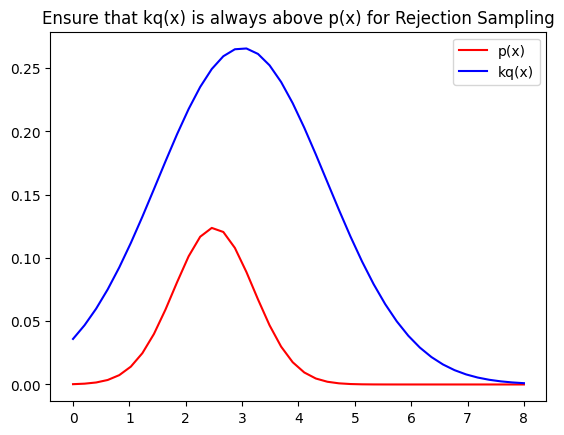

In [10]:
plt.plot(xln, px, color='red', label='p(x)')
plt.plot(xln, kq1, color='blue', label='kq(x)')
plt.legend()
plt.title('Ensure that kq(x) is always above p(x) for Rejection Sampling')
plt.show()

 Generate samples

In [11]:
μᶜ, σᶜ, samplesᶜ = conditional_gaussian(μ, Σ, xշ, 9000)
μᵣ, σᵣ, samplesᵣ = rejection_sampling()

Plot

In [12]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

Conditional Sampling subplot

In [13]:
plt.subplot(1, 2, 1)
hist_cond, bins_cond, _ = plt.hist(samplesᶜ, bins=50, density=False, alpha=0.7)
max_height_cond = np.max(hist_cond)
plt.axhline(y=max_height_cond, color='red', linestyle='--', label='Peak')
plt.title(f'Sampling from Conditional $p(x_1|x_2=1)$\nμ={μᶜ:.2f}, σ={σᶜ:.2f}')
plt.xlabel('x1')
plt.ylabel('Density')
plt.ylim([0,600])
plt.legend()

Rejection Sampling subplot

In [14]:
plt.subplot(1, 2, 2)
hist_rej, bins_rej, _ = plt.hist(samplesᵣ , bins=50, density=False, alpha=0.7)
max_height_rej = np.max(hist_rej)
plt.axhline(y=max_height_rej, color='red', linestyle='--', label='Peak')
plt.title(f'Sampling from Joint $p(x_1,x_2=1)$\nμ={μᵣ:.2f}, σ={σᵣ:.2f}')
plt.xlabel('x1')
plt.ylabel('Density')
plt.ylim([0,600])
plt.legend()

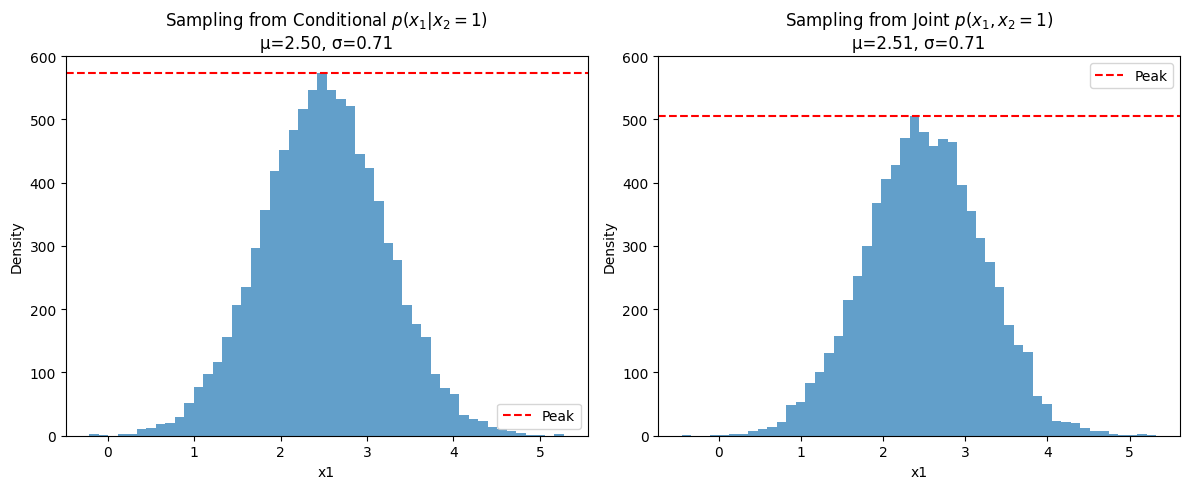

In [15]:
plt.tight_layout()
plt.show()